# Sesión 7: Introducción a las redes neuronales: intuiciones y manejo en Keras

Por [Alejandro Vidal](https://es.linkedin.com/in/alejandro-vidal-508944bb)

## Introducción y Contexto

Redes neuronales, neural networks (NN) son modelos con una amplia popularidad en los últimos años debido a su flexibilida y rendimiento en tareas previamente muy complejas.

Ahora mismo son el estado del arte en prácticamente todas las áreas de la inteligencia artificial y su ámbito aplicado: lenguaje natural, visión por computador, aprendizaje por refuerzo, conducción autónoma, síntesis de medicamentos, personalización, ...

Es una familia de modelos que originalmente estaba **vagamente** inspirada por las neuronas animales pero que actualmente consta de arquitecturas y tipos muy diversos ya alejadas de las neuronas "reales.

![Neurona](https://upload.wikimedia.org/wikipedia/commons/4/44/Neuron3.png)

*Créditos: By Egm4313.s12 (Prof. Loc Vu-Quoc) - Own work, CC BY-SA 4.0, [Fuente](https://commons.wikimedia.org/w/index.php?curid=72816083
)*

Este símil con las neuronas reales se da porque cada neurona (artificial y real) recibe varias señales o **inputs** que combina y devuelve un output. La combinación de muchas neuronas permite la creación de operaciones más complejas.

Al área que trabaja con estos modelos se le conoce como **deep learning** o **aprendizaje profundo**. Este nombre viene del hecho que los modelos de NN están compuestos por varias capas.

A pesar de su atractivo es necesario destacar que son modelos complicados de ejecutar, que requieren conocimientos muy concretos y que en ocasiones no son necesarias para resolver muchos problemas que existen en las empresas. Es contraproducente intentar resolver todo con NN y en términos generales no debería ser la primera alternativa. En general en el ámbito de la analítica las NN son muy poco utilizadas.

## Intuiciones sobre las NN

Vamos a usar [Tensorflow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.93564&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) para hacer algunas demostraciones. En esta web puedes entrenar una NN cambiando su arquitectura y otros parámetros. Vamos a resolver un problema de clasificación binaria (separar los puntos azules de los naranjas):

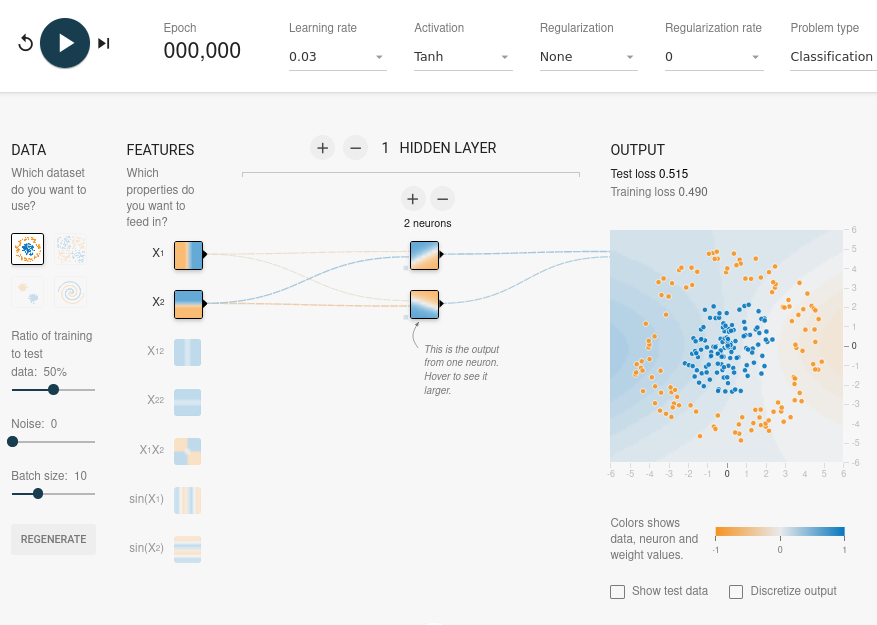

### Las redes neuronales se diseñan apilando distintos tipos de capas

Estas arquitecturas se conocen como secuenciales y aunque no todas las NN son así es común diseñarlas así y dividiremos las capas en tres segmentos:

1. A la primera capa la llamaremos **capa de entrada** o **Input** y cada neurona de esta capa representa una variable del dataset. Si hay 15 variables tendremos 15 neuronas en esta capa
2. A todas las capas posteriores (salvo la última) las llamaremos **capas intermedias** o **capas ocultas**. Son las que realizarán las transformaciones de las variables para conseguir el resultado final.
3. Por último, la **capa de salida** contiene las neuronas que se usan como resultado del modelo. Dependiendo del problema será una capa de sólo una neurona (p.e.: regresión o clasificación binaria) o varias (p.e.: multiclase)

### Las neuronas combinan información de la capa anterior para crear cosas más "complejas" y así sucesivamente

En un ejemplo sencillo como este podemos ver como sólo dos neuronas no pueden resolver este problema de clasificación.

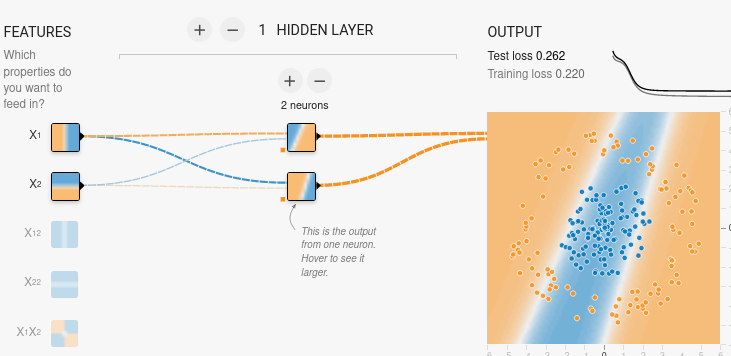

La primera neurona de la para oculta crea un límite por la izquierda (lateral izquierdo de la elipse azul que aparece en el output) y la segunda el lateral derecho.

Combinando ambas logramos obtener esa elipse.

Podemos darnos cuenta que si queremos clasificar los puntos azules en el interior necesitamos al menos **tres neuronas** que podrán formar tres límites y combinarlos en un triángulo. Veamos:

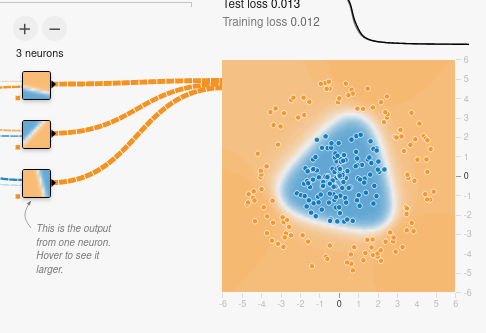

Efectivamente podemos ver que las tres neuronas crean tres límites que permiten "rodear" a los puntos.

Si usamos un problema más complejo (segundo dataset de la herramienta también conocido como [dataset XOR](https://stats.stackexchange.com/questions/498434/are-these-two-2d-datasets-the-same-and-can-they-be-separated-with-the-xor-nn)) necesitaremos una arquitectura algo más complicada. Usaremos 2 capas de 2 neuronas:

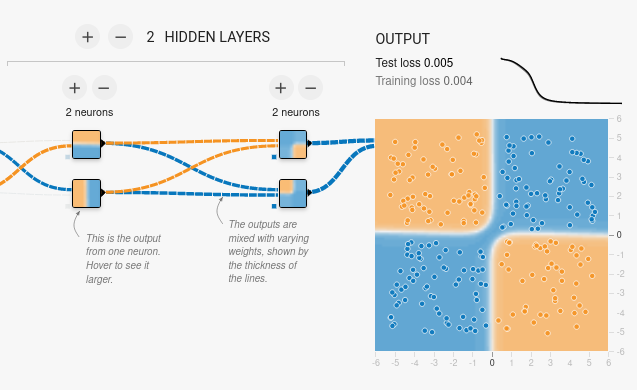

Podemos ver cómo resuelve satisfactoriamente la clasificación. Si observamos atentamente veremos que la primera capa tiene neuronas con un resultado muy "sencillo" (podéis ver en la miniatura de cada neurona su salida): por ejemplo la primera capa tiene respectivamente una línea horizontal y otra vertical. Pero si vamos a la siguiente capa veremos formas más complejas: cuadrados en las esquinas (justo lo que necesitamos para resolver el problema)

Es decir, en términos generales las capas posteriores podrán crear patrones más complejos apoyándose en el resultado de la capa anterior. El hecho de apilar muchas capas permite crear patrones muy complejos de forma jerárquica. Por eso lo denominamos aprendizaje "profundo".

Un ejemplo real y muy visual es el de las CNN o Convolutional Neural Networks. Muy populares para trabajar con imágenes. Podéis ver la diferencia entre los patrones detectados por las primeras capas (más sencillas) y por las siguientes capas (cada vez más complejos)

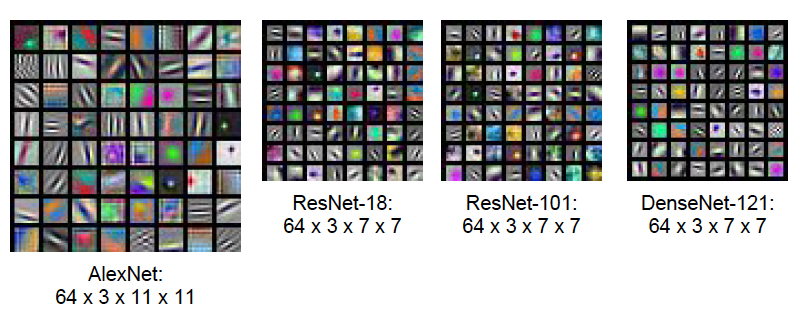

[Fuente](https://srdas.github.io/DLBook/ConvNets.html#visualizing-convnets)

Las NN han demostrado alta flexibilidad porque permiten aprender jerárquicamente características cada vez más avanzadas "simplemente" apilando más capas (obviamente, no es tan sencillo).

### Las NN se entrenan con algoritmos iterativos (paso a paso).

En la animación de la herramienta podéis ver como al pulsar el play la red neuronal va aprendiendo poco a poco. Si disminuís el "Learning rate" será más lento. Si lo aumentáis será más inestable.

Lo importante es entender que las NN se entrenan en un proceso secuencial que va mejorando poco a poco cada vez más hasta llegar a una NN bien entrenada.

Esto será importante para entender cómo entrenamos y qué debemos hacer antes de entrenarlas

### No por tener más neuronas se obtiene mejor resultado

Hemos visto antes que con dos neuronas no lograríamos resolver bien el problema de clasificación. Pero aunque a mayor número de neuronas y capas la red tiene hipotéticamente flexibilidad no siempre va a suponer una mejor red.

De hecho si hubiera demasiadas neuronas, es decir, una arquitectura demasiada compleja para el problema además de perder rendimiento veremos que hay neuronas que "no hacen nada" o son idénticas y por tanto redundantes.

En esta red excesivamente grande podemos ver que las 5 neuronas del final obtienen prácticamente el mismo resultado (el círuclo que separa los puntos azules):

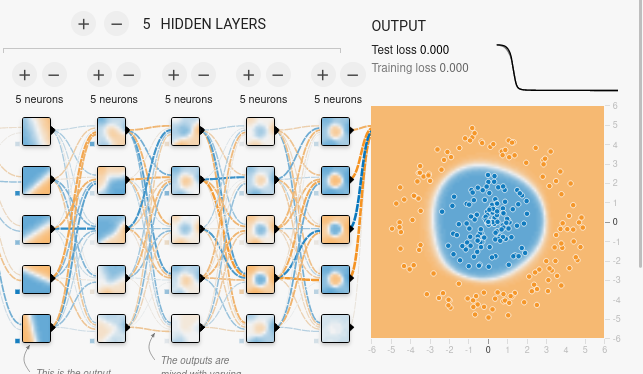


<div class="alert alert-block alert-warning">
<b>Nota: </b>Estas explicaciones pretender dar un acercamiento intuitivo. Tened en cuenta que tienen errores, imprecisiones y no deben ser interpretadas literalmente. Es más importante quedarse con la idea general para luego comprender mejor lo que se realiza
</div>

In [1]:
# Importamos los usuales..
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

Keras puede ser importado desde tensorflow aunque también existe como librería independiente. En general, por comodidad y para evitar diferencias de viersiones es mejor importarlo desde tensorflow.

Siempre vamos a importar al menos 3 cosas: tensorflow, keras y keras.layers:

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


## MLP para clasificación binaria

Usaremos [Breast Cancer Wisconsin Data set](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic))

In [3]:
x, y = load_breast_cancer(return_X_y=True)
print(load_breast_cancer()["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

<div class="alert alert-block alert-info">
<b>Nota:</b>En la sesión en directo hemos omitido esta parte porque no era necesaria para hacer la red neuronal.
</div>

### Preparación

Hemos obtenido las matrices de numpy que son más óptimas para luego entrenar una NN, pero para los análisis son más convientes los dataframes de pandas (parecen lo mismo pero no lo son). Veamos usando `type` y `pd.DataFrame` como podemos transformarlos y analizarlos:

In [4]:
type(x), type(y) # numpy

(numpy.ndarray, numpy.ndarray)

In [5]:
# convertimos a dataframe y añadimos el nombre de las columnas para mayor comodidad:
colnames = np.char.replace(load_breast_cancer()["feature_names"], " ", "_")
print(colnames)

df = pd.DataFrame(x, columns=colnames)

['mean_radius' 'mean_texture' 'mean_perimeter' 'mean_area'
 'mean_smoothness' 'mean_compactness' 'mean_concavity'
 'mean_concave_points' 'mean_symmetry' 'mean_fractal_dimension'
 'radius_error' 'texture_error' 'perimeter_error' 'area_error'
 'smoothness_error' 'compactness_error' 'concavity_error'
 'concave_points_error' 'symmetry_error' 'fractal_dimension_error'
 'worst_radius' 'worst_texture' 'worst_perimeter' 'worst_area'
 'worst_smoothness' 'worst_compactness' 'worst_concavity'
 'worst_concave_points' 'worst_symmetry' 'worst_fractal_dimension']


Añadimos la y (target) al dataframe conviritiendola antes en una variable categórica para
todavía mayor comodidad. Más info [aquí](https://pandas.pydata.org/docs/user_guide/categorical.html)

Simplificandolo mucho son números (0, 1 en este caso) a los que se le asigna un "nombre". 0 = "Maligno" y 1 = "Beningo"

In [6]:
y_categorical = pd.Categorical(y).rename_categories({0:"Maligno", 1:"Benigno"})

In [7]:
df.loc[:, "y"] = y_categorical # La añadimos al dataframe para tener todo junto

### Análisis

Con este dataframe ya podemos mirar las cosas básicas: distribuciones y relación de las features con la target variable (`y`)

In [8]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Maligno
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Maligno
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Maligno
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Maligno
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Maligno


In [9]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<AxesSubplot:>

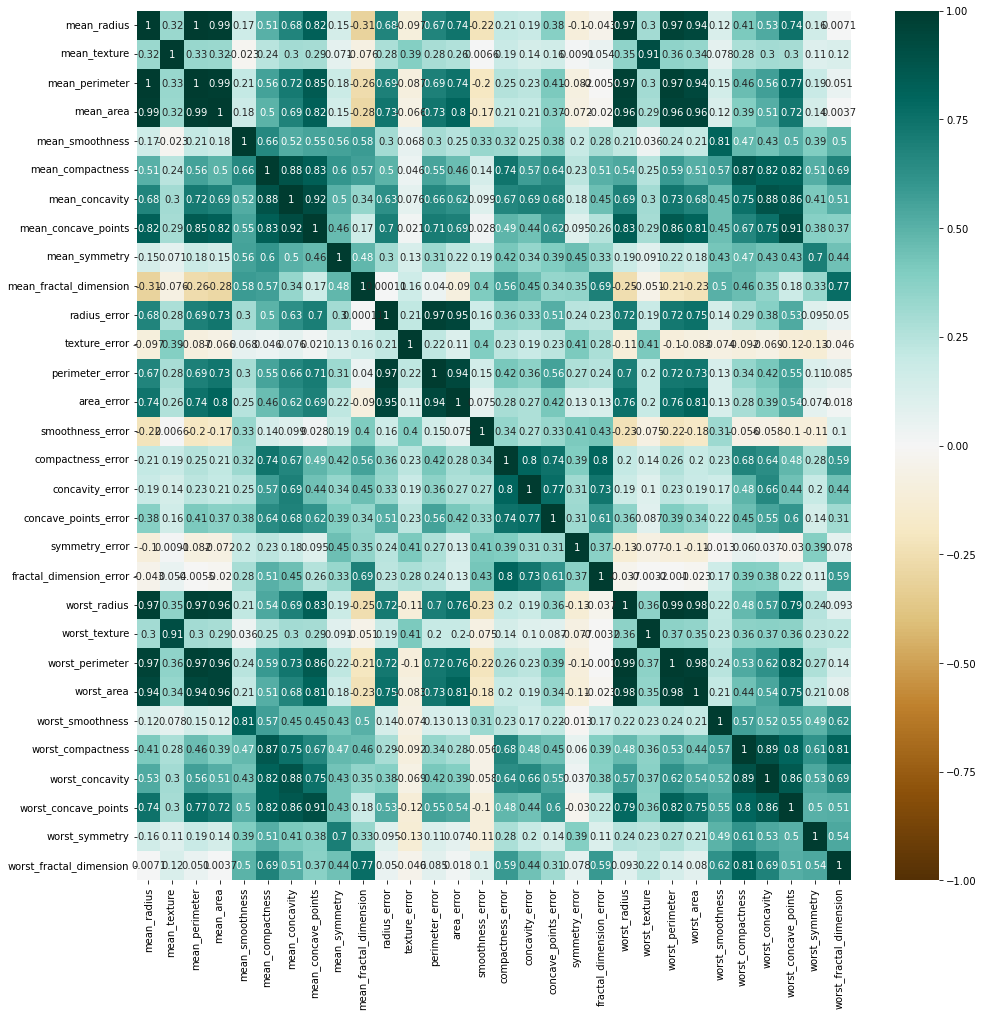

In [10]:
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="BrBG")

Podemos ver que hay variables muy correlacionadas y tiene sentido. Tenemos métricas que están relacionadas matemáticamente (perímetro y área correlacionan > 0.90). Por otro lado otras variables correlacionan de forma "natural" por el fenómeno que estudiamos (masas cancerígenas). Por ejemplo `mean_concave_points` y `mean_radius` correlacionan (`0.82`) porque ambos son indicadores clínicos del avance de la enfermedad.

Que las features correlacionen tanto es perjudicial para los modelos (no todos son igual de sensibles). Si quieres entrar más en detalle [esta respuesta de stackexchange es una buena introducción](https://datascience.stackexchange.com/questions/24452/in-supervised-learning-why-is-it-bad-to-have-correlated-features)

Dependiendo del modelo que usáramos deberíamos seleccionar algunas variables ([feature selection](https://scikit-learn.org/stable/modules/feature_selection.html)), preprocesar el dataset con alguna técnica como PCA que puede eliminar las covarianzas entre variables (más info [aquí](https://towardsdatascience.com/principal-component-regression-clearly-explained-and-implemented-608471530a2f) y [aquí](https://goodboychan.github.io/python/datacamp/machine_learning/2020/06/02/01-Decorrelating-your-data-and-dimension-reduction.html).

Para el modelo de hoy (MLP) no es tan problemático así que podemos permitirnos entrenar el dataset sin tener que hacer nada de esto.

Antes de comenzar el modelo conviene entender cómo están relacionadas nuestras features con la target variable. En este caso al ser numérica (la feature) y dicotómica (la target) vamos a ver la distribución separando cada grupo (maligno y benigno). Si vemos que ambas distribuciones están "separadas" será buena señal: nueva feature aporta información para saber si el tumor es maligno o benigno. Veamos un ejemplo de una feature:

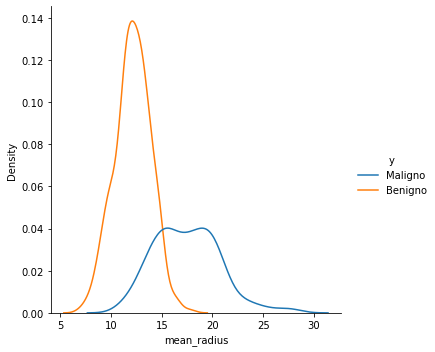

In [11]:
sns.displot(df, x="mean_radius", hue="y", kind="kde")

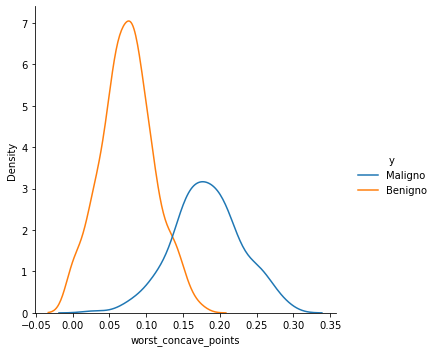

In [12]:
sns.displot(df, x="worst_concave_points", hue="y", kind="kde")

Las variables anteriores son buenas (ambas curvas se separan). Es decir, a medida que aumenta o disminuye esa variable la probabilidad estimada de pertenecer al grupo "maligno" cambia. En cambio otras variables parecen menos relevantes:

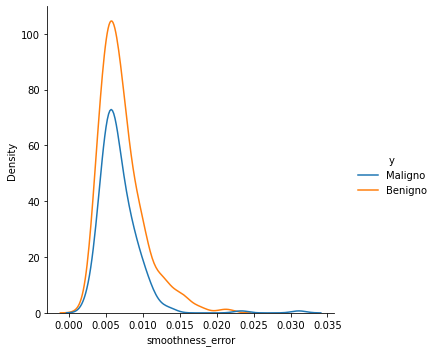

In [13]:
sns.displot(df, x="smoothness_error", hue="y", kind="kde")

En cualquier caso, en este ejercicio NO eliminaremos ninguna variable.

**Nota importante**: Este análisis es bivariado (relacionamos dos variables: una feature con la `y`). No debe tomarse como único criterio para eliminar variables ya que no se perciben relaciones **multivariadas** ni interacciones entre variables.

Este análisis sólo detectaría relaciones **directas** con la variable `y`. Puede haber interacciones más complejas (multivariadas) entre varias features que no se observen en estos gráficos y por tanto puede ser relevante mantenerlas en el modelo. El elegir variables es una artesanía llena de "trucos", distintos criterios y no es fácil tener siempre una respuesta. Una estrategia común (para bien y para mal) es probar de todo (incluyendo y excluyendo variables, cambiando hiperparámetros, el modelo, ...) y comparar las métricas de calidad y simplemente quedarse con la mejor.

Un ejemplo hipotético para entenderlo mejor: la altura puede que no tenga una relación directa con las enfermedades cardiovasculares. (a mayor o menor altura no cambia tu prob. de padecerlas). Esto superficialmente parece decir que la altura no sería buena feature para un modelo. Pero si seguimos investigando vemos que la **altura junto al peso** (intuitivamente podéis considerarlo como un "indice de masa corporal" o un "indicador de obesidad") sí tiene una relación muy importante con las enfermedades cardiovasculares. **La influencia de la altura está mediada/influenciada/interactúa con el peso ( y viceversa )**: es decir estamos hablando de una interacción múltiple entre variables.

### Preprocesamiento

#### Dividir train / test

Nota: ya no usaremos el dataframe de pandas sino la matriz de numpy que cargamos al principio (x, y)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
x.shape, y.shape

((569, 30), (569,))

In [16]:
x_train.shape, y_train.shape

((455, 30), (455,))

In [17]:
x_test.shape, y_test.shape

((114, 30), (114,))

#### Escalado

Para que las redes neuronales convergan bien es muy importante reescalar las variables. Tipicamente entre -1 y 1 o entre 0 y 1 o estandarizar (media = 0 y SD = 1). Vamos a hacerlo "manualmente" para entender como se hace:

In [18]:
# Calculamos el máximo y mínimo
maxs = np.max(x_train, axis=0)
mins = np.min(x_train, axis=0)

ranges = maxs - mins

In [19]:
mins.shape # obtenemos 30: uno para cada variable

(30,)

Fijaros que vamos a usar los mismos máximos y mínimos para normalizar train y test. Esto se hace así y es un error muy común que podríamos considerar un ejemplo de [Leakage](https://en.wikipedia.org/wiki/Leakage_(machine_learning)) (ver la seción Training example leakage para una explicación similar a lo que ocurre aquí).

In [20]:
# Normalizamos las variables
x_train = (x_train - mins) / ranges
x_test = (x_test - mins) / ranges

Simplificando (mucho) intuitivamente el modelo sólo aprende del train y el test no debe verlo **bajo ningún concepto**. Si lo viera estaríamos "haciendo trampas" pero lo que es peor: estaríamos obteniendo modelos que aunque parezcan buenos **van a fallar cuando comencemos a usarlos porque han aprendido su test**. En cualquier caso no debemos usar el test.

Por eso:
1. El preprocesamiento (en este caso escalar) lo vamos a hacer **usando sólo el train**. Es decir, el `np.max` de hace tres celdas se calculará sólo con train. Recordar que **NO podemos usar información del train en el modelo** aunque sea muy "pequeña" como es un máximo o una media. Si calculamos la media/máximo/mínimo/loquesea de todo el dataset (incluyendo test) estamos "filtrando" (leakage) información del test a través de la media.
2. El preprocesamiento que hagamos debe ser constante en train y test. Así que usaremos los mismos `scales` y `mins` para normalizar las variables en el dataset tanto de train como de test. 

A efectos prácticos esto significa que: los modelos y sus preprocesamientos sólo pueden entrenarse o aprender del train. Si un preprocesamiento requiere calcular algo ese algo debe ser obtenido sólo del train y aplicado posteriormente al train y test.

Podemos comprobar que los rangos de las variables están entre 0 y 1 para **train** pero no necesariamente para **test:

In [21]:
np.min(x_train, axis=0), np.max(x_train, axis=0) # En train todo en orden: de 0 a 1

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

Pero en test no son 0 y 1 sino que son aproximadamente 0 y 1. Esto es correcto. Recordar que hemos "aprendido"
los rangos del train. Estos rangos no son perfectos sino que son estimaciones de una muestra. Por tanto en el test
y en futuras muestras podemos encontrar datos que estén ligeramente por encima y por debajo de los rangos previos.

En este caso podemos ver que no hay nada importante. Desviaciones de 0.1 que no afectarán al modelo.

In [22]:
np.min(x_test, axis=0), np.max(x_test, axis=0)

(array([-0.03477154,  0.04159621, -0.02937829, -0.01154209,  0.14128374,
         0.05547565,  0.        ,  0.        , -0.0571276 ,  0.05686605,
         0.00184682,  0.02649841,  0.00067851,  0.00402131,  0.05422035,
         0.02556554,  0.        ,  0.        ,  0.04960991,  0.01120048,
        -0.02733718,  0.01252665, -0.02074119, -0.00952759,  0.11424302,
         0.03036426,  0.        ,  0.        ,  0.00019712,  0.03399457]),
 array([0.85846516, 0.72404464, 0.87907241, 0.73268686, 0.76257109,
        1.11643038, 0.87956888, 0.91699801, 0.92845702, 0.68386689,
        0.42712294, 0.7814268 , 0.41831975, 0.36028898, 0.46731482,
        0.52511491, 0.27550505, 0.54044327, 1.32643996, 0.35947929,
        0.87025802, 0.93656716, 0.81088913, 0.79605002, 1.02852679,
        1.13188961, 0.88258786, 0.98522337, 0.76384782, 1.29247202]))

### Modelado: MLP (Multilayer Perceptron)

Esta es una red neuronal muy básica. De las primeras planteadas pero para problemas de clasificación que no sean imágenes o datos más complejos son muy buenas. Pueden usarse para clasificar (binario o multiclase) y para regresiones. En este caso al ser un problema de clasificación binaria vamos a usarlas con la siguiente estructura:

1. Capa de entrada (recibo los datos). En este caso 30 variables. Habrá una neurona para cada variable
2. Capas intermedias: varias capas de distintas cantidades de neuronas. Son las que permiten hacer relaciones más complejas entre las variables.
3. Capa de salida: una única neurona porque al ser un problema de clasificación binaria sólo necesitamos obtener un 0 o un 1. En otro tipo de problemas habrá más neuronas (p.e.: clasificación múltiple en el que cada neurona de salida "marca" cada categoría).

Esta estructura se llama **secuencial** porque cada capa se conecta con la siguiente y así sucesivamente. Una NN **secuencial** es simplemente una enumeración de capas.

In [23]:
n_features = x_train.shape[1] # 30

In [24]:
model = keras.Sequential()

# Capa de entrada que tiene 30 neuronas
model.add(keras.Input(n_features))

# Capas intermedias
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(16, activation="relu"))

# Capa de salida con sólo una neurona
model.add(layers.Dense(1, activation="sigmoid"))

2023-01-14 16:30:13.112801: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-01-14 16:30:13.113271: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-14 16:30:13.115395: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [25]:
# Tenemos que configurar una pérdida y un optimizador (Adam)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Finalmente tenemos este modelo:

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1984      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 3,041
Trainable params: 3,041
Non-trainable params: 0
_________________________________________________________________


Vamos a entrenar el modelo:

In [27]:
model.fit(x_train, y_train, epochs=30, verbose=2)

2023-01-14 16:30:13.264909: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-01-14 16:30:13.284425: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1999965000 Hz


Epoch 1/30
15/15 - 0s - loss: 0.6784 - accuracy: 0.6286
Epoch 2/30
15/15 - 0s - loss: 0.6251 - accuracy: 0.6791
Epoch 3/30
15/15 - 0s - loss: 0.5759 - accuracy: 0.7473
Epoch 4/30
15/15 - 0s - loss: 0.5213 - accuracy: 0.8242
Epoch 5/30
15/15 - 0s - loss: 0.4626 - accuracy: 0.8703
Epoch 6/30
15/15 - 0s - loss: 0.4066 - accuracy: 0.8813
Epoch 7/30
15/15 - 0s - loss: 0.3523 - accuracy: 0.8967
Epoch 8/30
15/15 - 0s - loss: 0.3046 - accuracy: 0.9099
Epoch 9/30
15/15 - 0s - loss: 0.2668 - accuracy: 0.9165
Epoch 10/30
15/15 - 0s - loss: 0.2372 - accuracy: 0.9165
Epoch 11/30
15/15 - 0s - loss: 0.2107 - accuracy: 0.9319
Epoch 12/30
15/15 - 0s - loss: 0.1938 - accuracy: 0.9297
Epoch 13/30
15/15 - 0s - loss: 0.1780 - accuracy: 0.9341
Epoch 14/30
15/15 - 0s - loss: 0.1655 - accuracy: 0.9407
Epoch 15/30
15/15 - 0s - loss: 0.1534 - accuracy: 0.9495
Epoch 16/30
15/15 - 0s - loss: 0.1433 - accuracy: 0.9560
Epoch 17/30
15/15 - 0s - loss: 0.1352 - accuracy: 0.9582
Epoch 18/30
15/15 - 0s - loss: 0.1312 - 

### Evaluación del modelo

Vamos a ver qué tal es el modelo usando los datos de test

La capa de salida devuelve un número: cuando mayor sea significa mayor es la prob. de pertenecer a la categoría 1 (benigno).

In [28]:
test_output = model.predict(x_test).flatten()

(array([38.,  2.,  2.,  2.,  0.,  0.,  4.,  2.,  5., 59.]),
 array([2.4443865e-04, 1.0021828e-01, 2.0019212e-01, 3.0016598e-01,
        4.0013981e-01, 5.0011367e-01, 6.0008752e-01, 7.0006138e-01,
        8.0003518e-01, 9.0000904e-01, 9.9998289e-01], dtype=float32),
 <BarContainer object of 10 artists>)

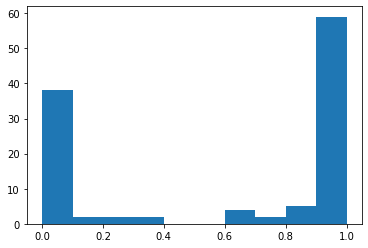

In [29]:
plt.hist(test_output)

La distribución es bimodal con dos picos en torno a 0 y 1 como es esperable en los modelos que han logrado clasificar correctamente. Digamos que hay pocos casos "dudosos" en el centro.

Vamos a usar `0.5` como punto de corte para la decisión (esto se puede ajustar y estudiar más en detalle con una curva ROC)

In [30]:
# Usaremos _pred para las predicciones
y_train_pred = model.predict(x_train).flatten() > 0.5
y_test_pred = model.predict(x_test).flatten() > 0.5

In [31]:
accuracy_score(y_train, y_train_pred)

0.9824175824175824

In [32]:
accuracy_score(y_test, y_test_pred)

0.9736842105263158

Tenemos buen accuracy (97% aprox) y similar en ambas divisiones (si hubiera mucha diferencia estaríamos ante un caso de [overfitting](https://en.wikipedia.org/wiki/Overfitting))

Vamos a ver más en detalle el modelo con un `classification_repor` y una matriz de confusión

In [33]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



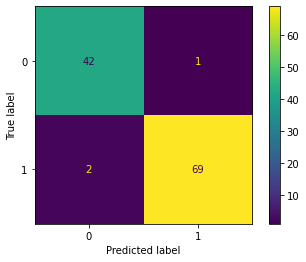

In [34]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred)).plot()